# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# print(os.getcwd())

df=pd.read_csv('data/bookReviewsData.csv')
df

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
...,...,...
1968,I purchased the book with the intention of tea...,True
1969,"There are so many design books, but the Graphi...",True
1970,I am thilled to see this book being available ...,True
1971,As many have stated before me the book starts ...,False


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.describe()

'''using the describe method, it turns out there are only 1865 
unique reviews out of 1973, indicating that there are some
duplicate reviews.In an effort to prepare the data through preprocessing, 
we must remove duplicates'''

'using the describe method, it turns out there are only 1865 \nunique reviews out of 1973, indicating that there are some\nduplicate reviews.In an effort to prepare the data through preprocessing, \nwe must remove duplicates'

In [5]:
df=df.drop_duplicates(subset="Review", keep="first")
df.describe()

,Review,Positive Review
count,1865,1865
unique,1865,2
top,So many disbelievers out there! I feel so sorr...,True
freq,1,979


In [6]:
df.info()
'''the results indicate that there are no nulls in our file'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1865 non-null   object
 1   Positive Review  1865 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 31.0+ KB


'the results indicate that there are no nulls in our file'

In [7]:
df.shape

(1865, 2)

In [8]:
print(df['Positive Review'].value_counts())
'''there are 979 positive reviews, and 886 negative reviews'''

True     979
False    886
Name: Positive Review, dtype: int64


'there are 979 positive reviews, and 886 negative reviews'

In [9]:
'''checking for missing values'''
df.isnull().sum()

#there are no missing values

Review             0
Positive Review    0
dtype: int64

In [10]:
#renaming review (feature) and positive review (label/ target)

df=df.rename(columns={"Review": "Review_Text", "Positive Review": "Is_Positive"})
df

,Review_Text,Is_Positive
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
...,...,...
1968,I purchased the book with the intention of tea...,True
1969,"There are so many design books, but the Graphi...",True
1970,I am thilled to see this book being available ...,True
1971,As many have stated before me the book starts ...,False


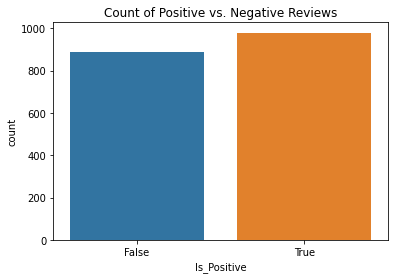

In [11]:
#want to visualize the data pertaining to the frequency of positives (true)
#and negative reviews (false)

sns.countplot(x="Is_Positive", data=df)
plt.title("Count of Positive vs. Negative Reviews")
plt.show()

In [12]:
'''one-hot encoding'''

df['Is_Positive']=df['Is_Positive'].astype(int)
df=pd.get_dummies(df, columns=['Is_Positive'])
df

,Review_Text,Is_Positive_0,Is_Positive_1
0,This was perhaps the best of Johannes Steinhof...,0,1
1,This very fascinating book is a story written ...,0,1
2,The four tales in this collection are beautifu...,0,1
3,The book contained more profanity than I expec...,1,0
4,We have now entered a second time of deep conc...,0,1
...,...,...,...
1968,I purchased the book with the intention of tea...,0,1
1969,"There are so many design books, but the Graphi...",0,1
1970,I am thilled to see this book being available ...,0,1
1971,As many have stated before me the book starts ...,1,0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [13]:
'''I would like to implement a binary classication model on this data,
to predict whether a given review is positive or not.'''

'I would like to implement a binary classication model on this data,\nto predict whether a given review is positive or not.'

In [14]:
X=df["Review_Text"]
y=df["Is_Positive_1"]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1234)

tfidf_vectorizer=TfidfVectorizer(max_features=5000)
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [15]:
LR=LogisticRegression()
LR.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred=LR.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7935656836461126
[[137  45]
 [ 32 159]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       182
           1       0.78      0.83      0.81       191

    accuracy                           0.79       373
   macro avg       0.80      0.79      0.79       373
weighted avg       0.79      0.79      0.79       373



In [17]:
'''model hyperparameter tuning'''
param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

print("Best hyperparameters::\n{}".format(grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Best hyperparameters::
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [18]:
'''training the final model'''
optimal_params={'C':10, 'penalty':'l2', "solver": "saga"}
LR_best=LogisticRegression(**optimal_params)
LR_best.fit(X_train_tfidf,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
'''evaluating on the test set'''
y_pred_best=LR_best.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Accuracy: 0.8096514745308311
[[143  39]
 [ 32 159]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       182
           1       0.80      0.83      0.82       191

    accuracy                           0.81       373
   macro avg       0.81      0.81      0.81       373
weighted avg       0.81      0.81      0.81       373



In [20]:
'''I now want to explore different models, Random Forest being next'''

'I now want to explore different models, Random Forest being next'

In [21]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf=rf.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7613941018766756
[[137  45]
 [ 44 147]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       182
           1       0.77      0.77      0.77       191

    accuracy                           0.76       373
   macro avg       0.76      0.76      0.76       373
weighted avg       0.76      0.76      0.76       373



Text(0.5, 1.0, 'Top 20 Most Important Features')

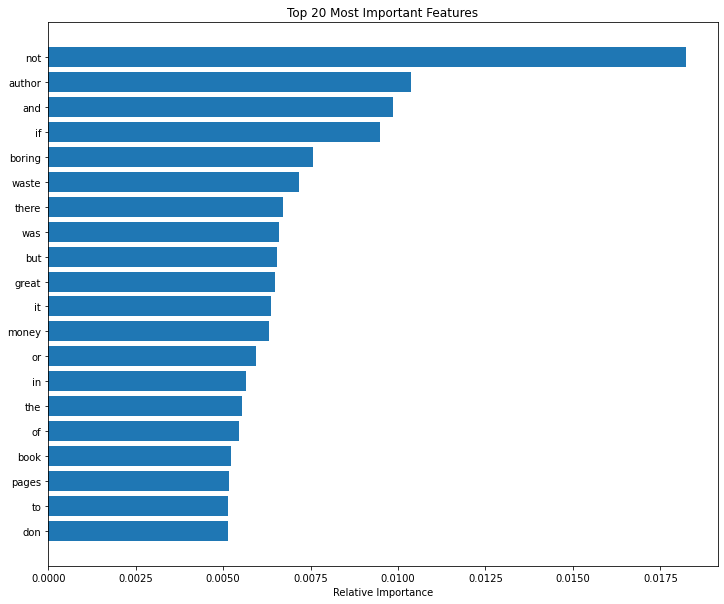

In [22]:
'''Now, i want to investigate which features are the most influential 
in making a prediction'''

importances=rf.feature_importances_
feature_names=tfidf_vectorizer.get_feature_names()
indices=np.argsort(importances)[-20:][::-1]
top_features=[]
for i in indices:
    top_features.append(feature_names[i])
top_importances=importances[indices]

plt.figure(figsize=(12,10))
plt.barh(top_features, top_importances, align='center')
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.title('Top 20 Most Important Features')
# plt.show()

In [23]:
'''Model Ensembling with Voting Classifier'''

lr_best=LogisticRegression(**optimal_params)
rf=RandomForestClassifier(n_estimators=100, random_state=42)
voting_clf=VotingClassifier(estimators=[('lr', lr_best), ('rf', rf)], voting='hard')
voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting=voting_clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

Accuracy: 0.7908847184986595
[[158  24]
 [ 54 137]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       182
           1       0.85      0.72      0.78       191

    accuracy                           0.79       373
   macro avg       0.80      0.79      0.79       373
weighted avg       0.80      0.79      0.79       373



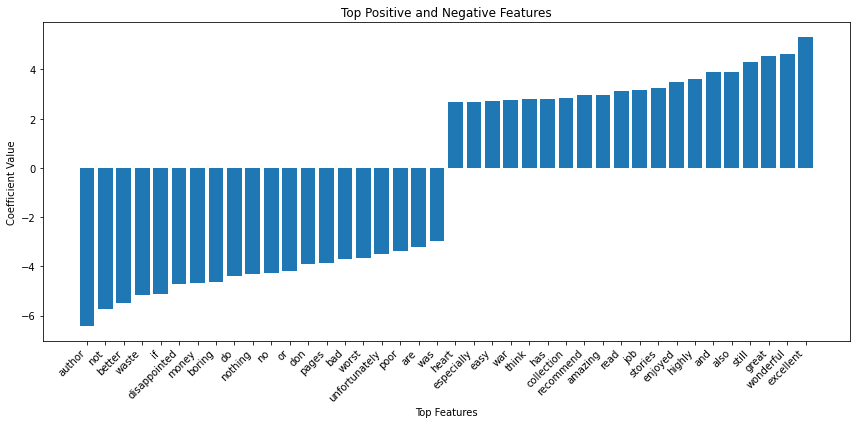

In [24]:
'''Model Interpretability for Logistic Regression'''
lr_best.fit(X_train_tfidf, y_train)
coef=lr_best.coef_.ravel()
top_pos_coeff=np.argsort(coef)[-20:]
top_neg_coeff=np.argsort(coef)[:20]
top_coeff=np.hstack([top_neg_coeff, top_pos_coeff])

feature_names=np.array(tfidf_vectorizer.get_feature_names())
top_features=feature_names[top_coeff]
top_coeff_values=coef[top_coeff]
plt.figure(figsize=(12,6))
plt.bar(top_features,top_coeff_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Features')
plt.ylabel('Coefficient Value')
plt.title('Top Positive and Negative Features')
plt.tight_layout()
plt.show()

In [25]:
param_grid={
    'C': [0.01, 0.1, 1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

print("Best hyperparameters:\n{}".format(grid.best_params_))

optimal_params={'C':10, 'penalty': 'l2', 'solver': 'liblinear'}
LR_best = LogisticRegression(**optimal_params, max_iter=1000)
LR_best.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Best hyperparameters:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
'''Logistic Regression Model Evaluation'''
y_pred_lr=LR_best.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8096514745308311
[[143  39]
 [ 32 159]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       182
           1       0.80      0.83      0.82       191

    accuracy                           0.81       373
   macro avg       0.81      0.81      0.81       373
weighted avg       0.81      0.81      0.81       373



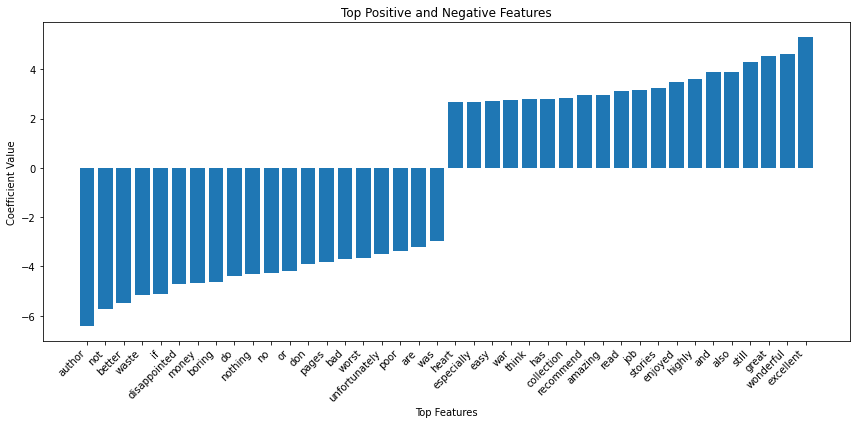

In [27]:
coef=LR_best.coef_.ravel()
top_post_coeff=np.argsort(coef)[-20:]
top_neg_coeff=np.argsort(coef)[:20]
top_coeff=np.hstack([top_neg_coeff, top_pos_coeff])

feature_names=np.array(tfidf_vectorizer.get_feature_names())
top_features=feature_names[top_coeff]
top_coeff_values=coef[top_coeff]

plt.figure(figsize=(12,6))
plt.bar(top_features, top_coeff_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Features')
plt.ylabel("Coefficient Value")
plt.title('Top Positive and Negative Features')
plt.tight_layout()
plt.show()



In [28]:
param_grid={
    'C': [0.01, 0.1, 1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid=GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)
best_params=grid.best_params_
print("Best hyperparameters:", best_params)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
best_params={'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
best_LR_model=LogisticRegression(**best_params, max_iter=1000)

best_LR_model.fit(X_train_tfidf, y_train)

y_pred_best=best_LR_model.predict(X_test_tfidf)

print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Logistic Regression Accuracy: 0.8096514745308311
[[143  39]
 [ 32 159]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       182
           1       0.80      0.83      0.82       191

    accuracy                           0.81       373
   macro avg       0.81      0.81      0.81       373
weighted avg       0.81      0.81      0.81       373



In [30]:
'''Model Selection'''

models={
    'Support Vector Machine': SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)
    accuracy=accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Support Vector Machine Accuracy: 0.7962
[[138  44]
 [ 32 159]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       182
           1       0.78      0.83      0.81       191

    accuracy                           0.80       373
   macro avg       0.80      0.80      0.80       373
weighted avg       0.80      0.80      0.80       373

Random Forest Accuracy: 0.7614
[[137  45]
 [ 44 147]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       182
           1       0.77      0.77      0.77       191

    accuracy                           0.76       373
   macro avg       0.76      0.76      0.76       373
weighted avg       0.76      0.76      0.76       373

Gradient Boosting Accuracy: 0.7641
[[130  52]
 [ 36 155]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       182
           1       0.75      0.81      0.78       191

    acc

In [31]:
'''Feature Selection'''

k_values=[10,20,30,50,100]
for k in k_values:
    selector=SelectKBest(score_func=chi2, k=k)
    X_train_selected =selector.fit_transform(X_train_tfidf, y_train)
    X_test_selected=selector.transform(X_test_tfidf)
    
    best_LR_model.fit(X_train_selected, y_train)
    y_pred_selected=best_LR_model.predict(X_test_selected)
    
    accuracy=accuracy_score(y_test, y_pred_selected)
    print(f'Features: [k], Tuned Logistic Regression Accuracy:{accuracy:.4f}')
    print(confusion_matrix(y_test, y_pred_selected))
    print(classification_report(y_test, y_pred_selected))

Features: [k], Tuned Logistic Regression Accuracy:0.6515
[[108  74]
 [ 56 135]]
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       182
           1       0.65      0.71      0.68       191

    accuracy                           0.65       373
   macro avg       0.65      0.65      0.65       373
weighted avg       0.65      0.65      0.65       373

Features: [k], Tuned Logistic Regression Accuracy:0.7346
[[133  49]
 [ 50 141]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       182
           1       0.74      0.74      0.74       191

    accuracy                           0.73       373
   macro avg       0.73      0.73      0.73       373
weighted avg       0.73      0.73      0.73       373

Features: [k], Tuned Logistic Regression Accuracy:0.7453
[[133  49]
 [ 46 145]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       1